# Analiza Danych

## Import i obróbka danych

In [1]:
# Import bibliotek
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



# Wczytanie danych AirQualityUCI.xlsx jako ramka danych
df = pd.read_excel('AirQualityUCI.xlsx')

# Sprawdzenie struktury danych 
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  Unnamed: 15    0 non-

Z podsumowania możemy zauważyć, że jest 9357 wpisów w ramce danych. Dwie ostatnie kolumny nie mają żadnych wpisów, więc je usunę. Pierwszą kolumnę typu `datetime64` zamienię na indeks czasu, żeby można było rozpatrywać dane jako szereg czasu.

In [2]:
# Usunięcie dwóch ostatnich kolumn
df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)
df_1 = df.copy()
df.set_index('Date', inplace=True)

# Wyświetlenie struktury danych
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 to 2005-04-04
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   object 
 1   CO(GT)         9357 non-null   float64
 2   PT08.S1(CO)    9357 non-null   float64
 3   NMHC(GT)       9357 non-null   int64  
 4   C6H6(GT)       9357 non-null   float64
 5   PT08.S2(NMHC)  9357 non-null   float64
 6   NOx(GT)        9357 non-null   float64
 7   PT08.S3(NOx)   9357 non-null   float64
 8   NO2(GT)        9357 non-null   float64
 9   PT08.S4(NO2)   9357 non-null   float64
 10  PT08.S5(O3)    9357 non-null   float64
 11  T              9357 non-null   float64
 12  RH             9357 non-null   float64
 13  AH             9357 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 1.1+ MB
None


Po ponownym wyświetleniu struktury danych możemy zauważyć, że występuje indeks czasu i możemy rozpatrywać dane jako szereg czasowy. W kolumnie RH nie występują braki danych.

In [3]:
# Wyświetlenie podstawowych statystyk
print(df.describe())

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.869652  -159.090093     1.865576     894.475963   
std      77.657170   329.817015   139.789093    41.380154     342.315902   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.004958     711.000000   
50%       1.500000  1052.500000  -200.000000     7.886653     894.500000   
75%       2.600000  1221.250000  -200.000000    13.636091    1104.750000   
max      11.900000  2039.750000  1189.000000    63.741476    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.604200    794.872333    58.135898   1391.363266   974.951534   
std     257.424561    321.977031   126.931428    467.192382   456.922728   
min    -200

Z podsumowania podstawowych statystyk zmiennych możemy zauważyć, że w każdej z nich występuje minimum równe `-200`. Cecha, którą będę badał `RH` to wartość wilgotności powietrza i spodziewałbym się jej w zakresie od `0` do `100`. Podejrzewam, że są to błędy w danych i mogą one wpływać na wyniki obliczeń. Przedstawię teraz wykres średniej wilgotności powietrza w kolejnych dniach.

## Wykresy wilgotności powietrza

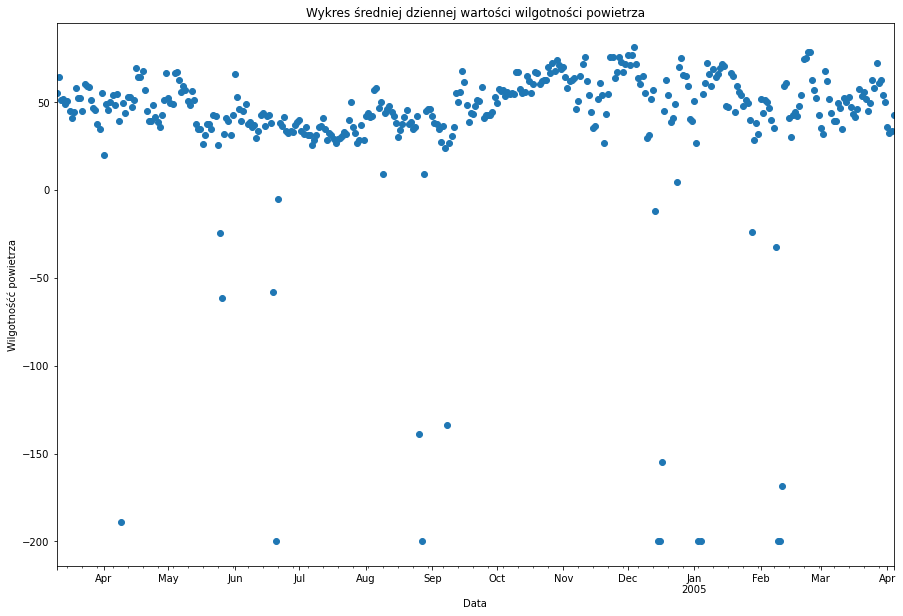

In [4]:
# Narysowanie wykresu
df['RH'].resample("D").mean().plot(style="o", figsize=(15, 10), xlabel = 'Data', 
                                   title = 'Wykres średniej dziennej wartości wilgotności powietrza',
                                  ylabel = 'Wilgotnośćć powietrza');

Z wykresu możemy zauważyć, że w niektóre dni średnia wilgotność powietrza jest mniejsza od `0`. Spowodowane jest to występującymi wartościami `-200`. Sprawdzę teraz wartości odstające i stworzę kolumnę `Outlier` z wartością `True` albo `False` w zależności czy dana obserwacja jest odstająca.

In [5]:
# Obliczenie danych potrzebnych do sprawdzenia wartości odstających
RH_std = np.std(df['RH'])
RH_mean = np.mean(df['RH'])
outlier = RH_std * 3
lower_limit  = RH_mean - outlier
upper_limit = RH_mean + outlier


# Funkcja przypisująca wartość True lub False
def find_outlier(df):
    if df['RH'] > upper_limit or df['RH'] < lower_limit:
        return True
    else:
        return False

# Przypisanie do kolumny Outlier wartości True lub False
df['Outlier'] = df.apply(find_outlier, axis=1)
print(df.head())
# Zliczenie wartości kolumny Outlier
df['Outlier'].value_counts()

                Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
Date                                                                            
2004-03-10  18:00:00     2.6      1360.00       150  11.881723        1045.50   
2004-03-10  19:00:00     2.0      1292.25       112   9.397165         954.75   
2004-03-10  20:00:00     2.2      1402.00        88   8.997817         939.25   
2004-03-10  21:00:00     2.2      1375.50        80   9.228796         948.25   
2004-03-10  22:00:00     1.6      1272.25        51   6.518224         835.50   

            NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)      T  \
Date                                                                           
2004-03-10    166.0       1056.25    113.0       1692.00      1267.50  13.60   
2004-03-10    103.0       1173.75     92.0       1558.75       972.25  13.30   
2004-03-10    131.0       1140.00    114.0       1554.50      1074.00  11.90   
2004-03-10    172.0       1092.0

False    8991
True      366
Name: Outlier, dtype: int64

Występuje `366` wartości odstających. Przedstawię wykres wilgotności powietrza z zaznaczonymi wartościami odstającymi.

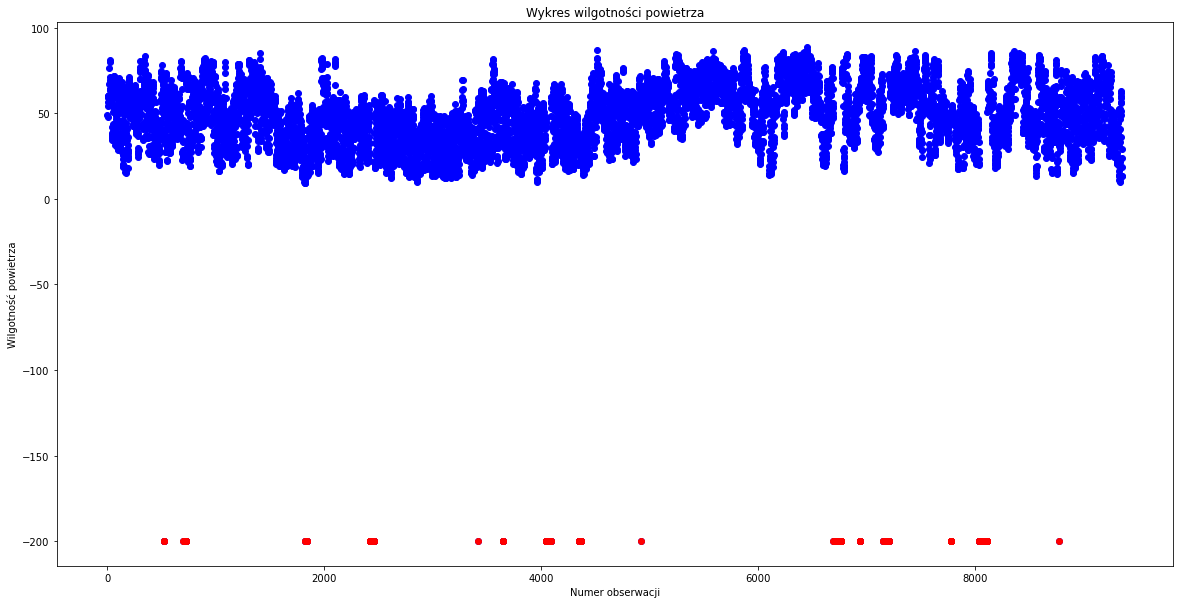

In [6]:
df_1['Outlier'] = df_1.apply(find_outlier, axis=1)
df1 = df_1.loc[df_1['Outlier'] == True]
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.scatter(df_1.index, df_1['RH'], color = 'blue')
plt.scatter(df1.index, df1['RH'], color = 'red')
plt.title('Wykres wilgotności powietrza')
plt.xlabel('Numer obserwacji')
plt.ylabel('Wilgotność powietrza')
plt.show()

Na wykresie możemy zauważyć obserwacje odstające zaznaczone na czerwono. Są one równe `-200`. Po dokładniejszym przeanalizowaniu struktury danych oraz wykresu podejrzewam, że braki w danych reprezentowane są przez wpisy `-200`. Zamienię wartości odstające na medianę cechy `RH`. Najpierw zastąpię wartość `-200` na `NaN`, a następnie `NaN` na medianę. Użycie mediany jako wypełnienia brakujących danych nie powoduje zmian w statystykach danych i nie wpływa na wyniki.

In [7]:
# Zamiana wartości odstających na NaN
df['RH'] = df['RH'].replace(-200,np.nan)
df['RH'].isna().sum()

366

Powstało `366` wpisów brakujących, które zastąpię teraz medianą zmiennej `RH`.

In [8]:
# Zamiana NaN na medianę zmiennej RH
df['RH'] = df['RH'].fillna(df['RH'].median())
df['RH'].isna().sum()

0

Niepoprawne wpisy zostały zastąpione przez medianę zmiennej `RH` i ponownie narysuję wykres dziennej średniej wilgotności powietrza.

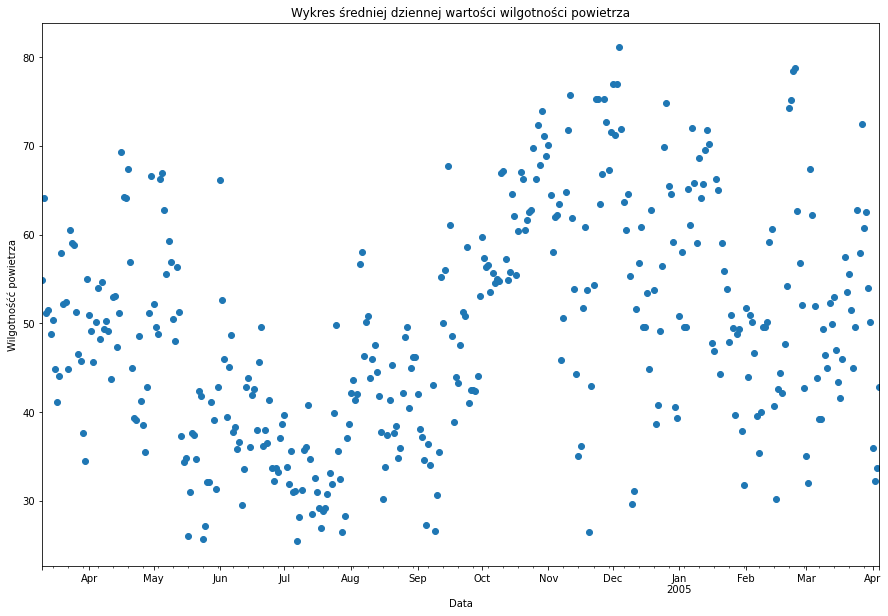

In [9]:
# Narysowanie wykresu
df['RH'].resample("D").mean().plot(style="o", figsize=(15, 10), xlabel = 'Data', 
                                   title = 'Wykres średniej dziennej wartości wilgotności powietrza',
                                  ylabel = 'Wilgotnośćć powietrza');

Teraz możemy zauważyć, że wartości dziennej średniej wilgotności powietrza są dodatnie w każdym dniu. Z wykresu możemy również zauważyć, że występuje cykliczność. Narysuję histogram rozkładu zmiennej `T`.

## Histogram zmiennej `T`

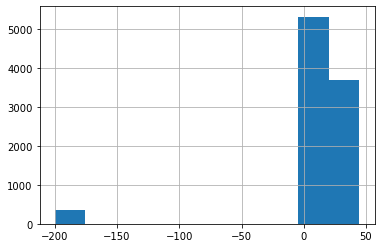

In [10]:
# Rysowanie histogramu zmiennej T
df['T'].hist()
plt.show()

Tak samo jak w zmiennej `RH` występują tutaj wartości `-200`, które deformują poprawny kształt rozkładu tej zmiennej. Zamienię teraz wszystkie wartości odstające równe `-200` w całej ramce danych, aby narysować nowy histogram rozkładu zmiennej `T` oraz stworzyć macierz korelacji. W przeciwnym wypadku współczynniki korelacji będą niepoprawne.

In [11]:
# Zamiana wartości odstających na NaN
df = df.replace(-200,np.nan)
# Sprawdzenie ilości wartości -200 w danej zmiennej
df.isna().sum()

Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                  0
AH                366
Outlier             0
dtype: int64

In [12]:
# Wypełnienie wartości NaN na mediany
df = df.fillna(df.median())

Po usunięciu wartości odstających w całej ramce danych narysuję ponownie rozkład zmiennej `T`.

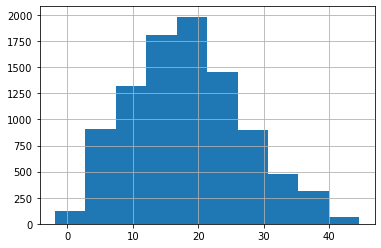

In [13]:
# Rysowanie histogramu zmiennej T
df['T'].hist()
plt.show()

Nie zaobserwowaliśmy asymetrii zmiennej `T`. Najliczniejszym przedziałem jest mediana, ponieważ uzupełniliśmy nią wartości odstające. Temperatura mieści się w zakresie od około `0` do `45`. Stworzę macierz korelacji, z której odczytam współczynnik korelacji między zmiennymi `T` i `RH`.

## Macierz korelacji

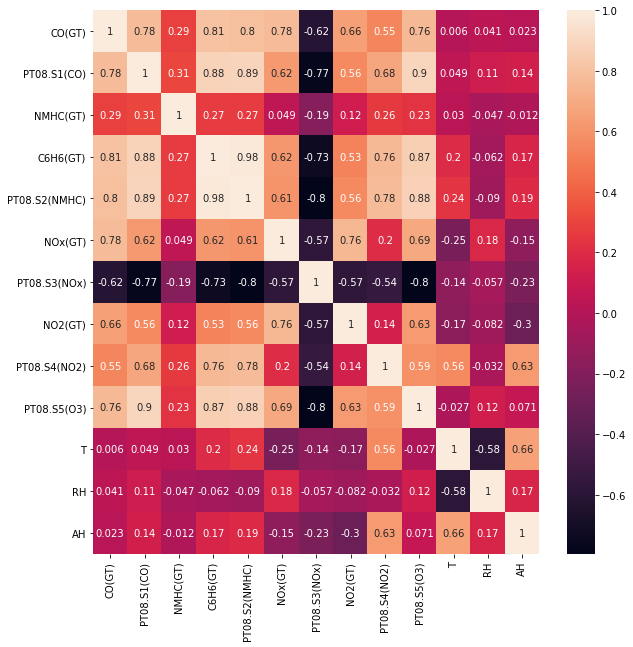

In [14]:
# Stworzenie macierzy korelacji
df2 = df.copy()
df2.drop(['Outlier'], axis=1, inplace=True)
corrM = df2.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corrM, annot=True)
plt.show()

Z macierzy korelacji możemy odczytać, że zmienne `RH` oraz `T` skorelowane są ujemnie. Współczynnik korelacji wynosi `-0.58` co oznacza, że wraz ze wzrostem jednej cechy maleje druga cecha. Innymi słowy jeśli temperatura rośnie to maleje wilgotność powietrza, a jeśli temperatura maleje to wilgotność powietrza rośnie. Zmienna `RH` nie jest skorelowana znacząco z żadną inną zmienną. Z macierzy korelacji możemy również odczytać, że najbardziej skorelowane są ze sobą zmienne `PT08.S2(NMHC)` oraz `C6H6(GT)`. Współczynnik korelacji dla tych zmiennych wynosi `0.98` i jest on bardzo blisko `1`. 